# **Assignment 2**
## **Classify the email using the binary classification method. Email Spam detection has two states:**

a. Normal State – Not Spam

b. Abnormal State – Spam.

Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
# Load the dataset and get info
df = pd.read_csv("emails.csv")

# Explore and pre-process the dataset
print("DF Info:")
print(df.info())

print("\nDF Shape:")
print(df.shape)

print("\nDF Description:")
print(df.describe())

# Getting names of columns w/ null values
nullCol = df.columns[df.isnull().any()]
print(nullCol)

DF Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None

DF Shape:
(5172, 3002)

DF Description:
               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  517

In [ ]:
# Partitioning dataset into features & target
x = df.iloc[ : , 1:-1].values # Getting array of values, removing the 1st and last column
y = df.iloc[ : , -1].values # Getting only the last column
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score, f1_score)

In [ ]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # transforms x_test based on mean and variance from x_train

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# KNN Metrics
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy Score: ", accuracy_score(y_test, y_pred_knn))
print("KNN Precision Score: ", precision_score(y_test, y_pred_knn))
print("KNN Recall Score: ", recall_score(y_test, y_pred_knn))
print("KNN F1 Score: ", f1_score(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035

KNN Accuracy Score:  0.8628019323671497
KNN Precision Score:  0.7251461988304093
KNN Recall Score:  0.8378378378378378
KNN F1 Score:  0.7774294670846394


Confusion Matrix:
 [[645  94]
 [ 48 248]]


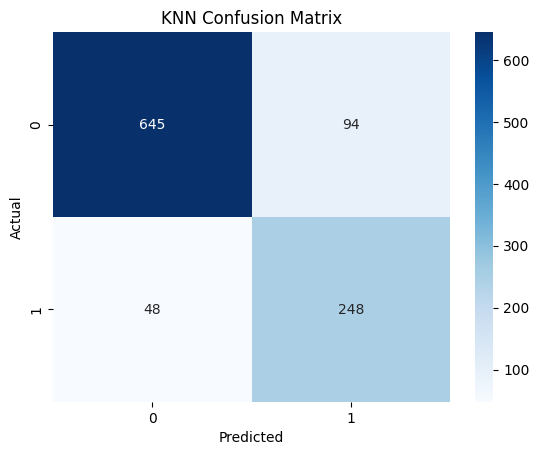

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Implementing SVM Classification
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# SVM Metrics
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print("SVM Precision Score: ", precision_score(y_test, y_pred_svm))
print("SVM Recall Score: ", recall_score(y_test, y_pred_svm))
print("SVM F1 Score: ", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

SVM Accuracy Score:  0.9594202898550724
SVM Precision Score:  0.9205298013245033
SVM Recall Score:  0.9391891891891891
SVM F1 Score:  0.9297658862876255
Confusion Matrix:
 [[715  24]
 [ 18 278]]


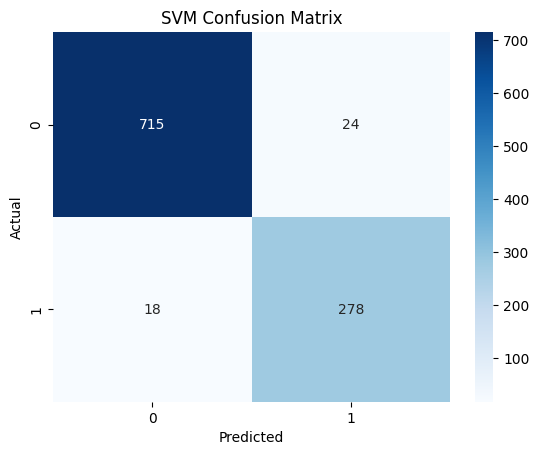

In [ ]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("SVM Confusion Matrix")
plt.show()